In [1]:
#Install hightea client and plotting library
%pip install hightea-client > /dev/null
%pip install hightea-plotting > /dev/null
from hightea.client.apiactions import API
from hightea.plotting import plot

In [2]:
api = API()
api.anonymous_login()

In [3]:
# Print process list
dict_of_processes = api.list_processes();
for proc in dict_of_processes.keys():
    print(dict_of_processes[proc].ljust(50)," tag :", proc.replace('processes/',''))

ttbar test data                                     tag : tests
pp -> tt~ + X at 13 TeV mt = 172.5 GeV HE           tag : pp_tt_13000_172.5_he
pp -> A A + X at 8 TeV                              tag : pp_aa_8000
pp -> Wp + Wm + X at 13 TeV                         tag : pp_ww_13000
pp -> j + X at 7 TeV                                tag : pp_j_7000
pp -> tt~ + X at 8 TeV mt = 172.5 GeV               tag : pp_tt_8000_172.5
pp -> e+ ve mu- vm~ + X at 13 TeV                   tag : pp_evmv_13000
pp -> tt~ + X at 13 TeV mt = 172.5 GeV              tag : pp_tt_13000_172.5


In [4]:
# Use tag to specify process and get some metadata
PROCESS = 'pp_tt_13000_172.5'
meta_data = api.get_metadata(PROCESS)
print(meta_data['name'])
print(meta_data['details'])
print("Predefined variables:",list(meta_data['variables'].keys()))

pp -> tt~ + X at 13 TeV mt = 172.5 GeV
Details:

 Parameters

 - pp collisions at 13 TeV
 - top-quark mass: mt = 172.5 GeV
 - number of massless flavours: nl = 5

 Contributions details

 - LO      : pQCD, aS^2
 - NLO     : pQCD, aS^2 + aS^3
 - NNLO    : pQCD, aS^2 + aS^3 + aS^4

 Additional information

 - Only onshell top-quark momenta accessible, no decays

 Citation

 - HighTEA arxiv:xxxx.xxxx
 - High-precision differential predictions for top-quark pairs at the LHC, arxiv:1511.00549

Predefined variables: ['pt_t', 'pt_tbar', 'y_t', 'y_tbar', 'm_tt', 'mt_t', 'mt_tbar', 'HTo4']


In [5]:
# define request in JSON format and submit
request = {
    "contributions": ["NLO"],
    "custom_variables": {
        'myvar':'sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2 + mt_t*mt_tbar)',
    },
    'pdf': 'CT14nnlo',
    'pdf_member':2,
    'muF': '2*HTo4',
    'muR': "myvar",
    "observables": [
        {
            "name":"mylabel",
            "binning":[{"variable": "myvar",
                        "bins":[345.,390,440.,480.,530.,570.,620.,665.,710.,755.,800.]}],
        }
    ]
}

response = api.request_hist(PROCESS, request)

In [6]:
# wait for the token to finish and retrieve the result
result = api.wait_token_json(response['token'])

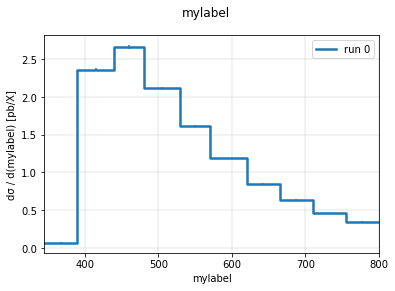

In [7]:
# show the result as a plot
plot(result);